The dataset used in this analysis is country_vaccinations.csv

In [150]:
import sys
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
%matplotlib inline

In [151]:
dataset=pd.read_csv("country_vaccinations.csv")

In [152]:
dataset.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,40.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,45.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,50.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


This shows the first 10 rows of the dataset.

In [153]:
dataset.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

This identifies the number of null values in each section in the dataset.

In [154]:
dataset.fillna(0, inplace= True) #this changes the null values to 0 in the dataset

In [155]:
dataset.drop(dataset.index[dataset['iso_code'] == 0], inplace = True)

In [156]:
dataset.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

As you can see, the null values have been changed to 0

In [157]:
dataset.info() # To determine the type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   86512 non-null  float64
 4   people_vaccinated                    86512 non-null  float64
 5   people_fully_vaccinated              86512 non-null  float64
 6   daily_vaccinations_raw               86512 non-null  float64
 7   daily_vaccinations                   86512 non-null  float64
 8   total_vaccinations_per_hundred       86512 non-null  float64
 9   people_vaccinated_per_hundred        86512 non-null  float64
 10  people_fully_vaccinated_per_hundred  86512 non-null  float64
 11  daily_vaccinations_per_milli

In [158]:
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d') #Changing the data type of date to datetime format (Previously as object).

In [159]:
dataset.drop(['people_fully_vaccinated','daily_vaccinations_raw','people_fully_vaccinated_per_hundred',
         'daily_vaccinations_per_million','people_vaccinated_per_hundred', 'source_name','source_website'], axis=1, inplace=True)

the data that we do not need to use has been removed.

<h1 style="font-size:3rem;color:orange;text-align: center;"> Covid Vaccine Analysis

<h2 style="font-size:2rem;color:orange;text-align: center;"> Philippines

In [160]:
dataset_PHL = dataset[dataset["iso_code"] == 'PHL'].copy()


In [161]:
dataset_PHL.drop(dataset_PHL.index[dataset_PHL['total_vaccinations'] == 0], inplace = True)
# This drops the data with the value of 0 in the total_vaccinations

In [162]:
dataset_PHL

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
61815,Philippines,PHL,2021-03-01,756.0,756.0,756.0,0.00,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
61816,Philippines,PHL,2021-03-02,2793.0,2793.0,1396.0,0.00,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
61818,Philippines,PHL,2021-03-04,10000.0,10000.0,2500.0,0.01,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
61820,Philippines,PHL,2021-03-06,25138.0,25138.0,4190.0,0.02,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
61821,Philippines,PHL,2021-03-07,29266.0,29266.0,4181.0,0.03,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
...,...,...,...,...,...,...,...,...
62168,Philippines,PHL,2022-02-17,133234116.0,0.0,410154.0,119.98,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
62172,Philippines,PHL,2022-02-21,134332014.0,0.0,331268.0,120.97,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
62192,Philippines,PHL,2022-03-13,137351822.0,0.0,150990.0,123.69,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
62203,Philippines,PHL,2022-03-24,141226139.0,0.0,352211.0,127.18,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


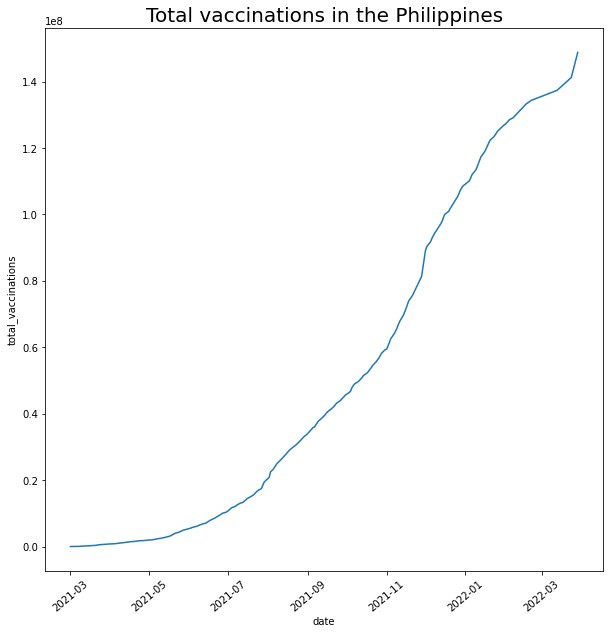

In [163]:
plt.figure(figsize=(10,10))
sns.lineplot(data=dataset_PHL, x="date", y="total_vaccinations")
plt.title("Total vaccinations in the Philippines", fontsize=20)
plt.xticks(rotation=40)
plt.show()

This shows the total vaccinations in the Philippines, as you can see the line plot has continued to increase, which means that people are more frequently getting vaccinated as the total vaccinations increase. 

Text(0.5, 1.0, 'Daily vaccinations in the Philippines')

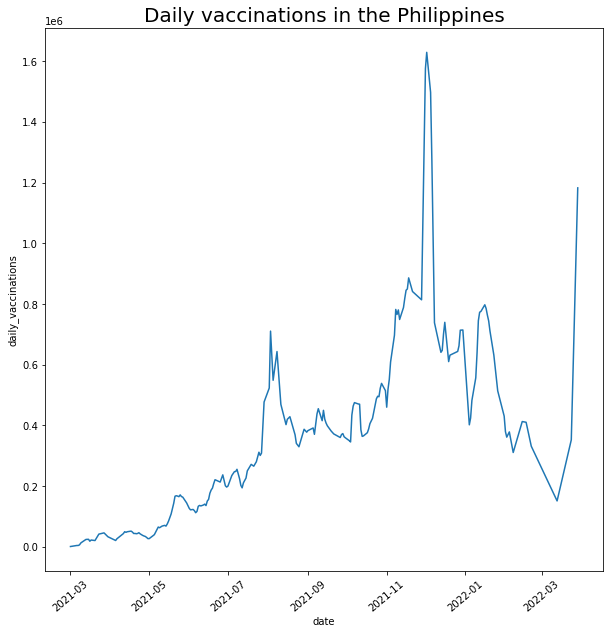

In [164]:
plt.figure(figsize=(10,10))
sns.lineplot(data=dataset_PHL, x="date", y="daily_vaccinations")

plt.xticks(rotation=40)
plt.title("Daily vaccinations in the Philippines", fontsize=20)

This shows the daily vaccinations in the Philippines. The rate of vaccinations daily varies, sometimes it is high and sometimes it is low. The peak of vaccinations happened between November 2021 and January 2022. The daily rate of vaccinations have decreased after 2022, this means that less people have been getting the vaccine, either because of hesistancy or a lot of people have been vaccinated already.

<p style="font-size:2rem;color:orange;text-align: center;"> Top 10 Countries with Highest Amount of Efficiency of Vaccination Relative to their Population.

In [166]:
totalvaccbycountry = dataset.groupby('country').max().sort_values('total_vaccinations', ascending=False)
totalvaccbycountry = totalvaccbycountry.iloc[:10]
totalvaccbycountry


,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-03-29,3.263129e+09,1.275541e+09,22424286.0,225.94,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2022-03-29,1.834501e+09,9.848381e+08,10037995.0,131.66,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2022-03-28,5.601818e+08,2.553624e+08,3506960.0,168.72,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1941268.0,193.26,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1897011.0,136.45,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr..."
Japan,JPN,2022-03-29,2.543456e+08,1.024675e+08,1997542.0,201.78,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Bangladesh,BGD,2022-03-29,2.436427e+08,1.275441e+08,3758404.0,146.50,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Pakistan,PAK,2022-03-10,2.193686e+08,1.280741e+08,2175773.0,97.41,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Vietnam,VNM,2022-03-22,2.031444e+08,7.994719e+07,1675471.0,206.93,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."


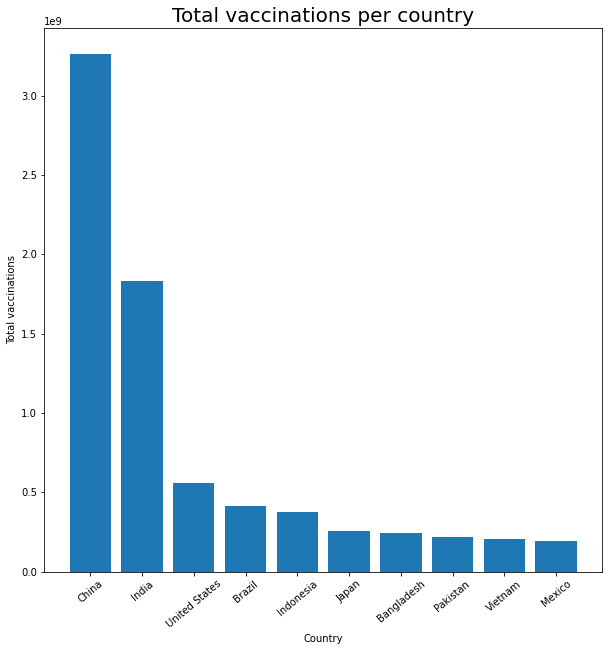

In [167]:
plt.figure(figsize=(10, 10))
plt.bar(totalvaccbycountry.index, totalvaccbycountry.total_vaccinations)
plt.title('Total vaccinations per country', fontsize=20)
plt.xticks(rotation = 40)
plt.ylabel('Total vaccinations')
plt.xlabel('Country')
plt.show()

This shows the top 10 countries with the most amount of vaccinations.

In [168]:
topvaccinebycountry = dataset.groupby('country',).max().sort_values('total_vaccinations', ascending=False)
topvaccinebycountry = topvaccinebycountry.iloc[:10]

In [169]:
topvaccinebycountry

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-03-29,3.263129e+09,1.275541e+09,22424286.0,225.94,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2022-03-29,1.834501e+09,9.848381e+08,10037995.0,131.66,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2022-03-28,5.601818e+08,2.553624e+08,3506960.0,168.72,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1941268.0,193.26,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1897011.0,136.45,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr..."
Japan,JPN,2022-03-29,2.543456e+08,1.024675e+08,1997542.0,201.78,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Bangladesh,BGD,2022-03-29,2.436427e+08,1.275441e+08,3758404.0,146.50,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Pakistan,PAK,2022-03-10,2.193686e+08,1.280741e+08,2175773.0,97.41,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Vietnam,VNM,2022-03-22,2.031444e+08,7.994719e+07,1675471.0,206.93,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."


In [170]:
topvaccinebycountry = topvaccinebycountry.sort_values('total_vaccinations_per_hundred', ascending=False)
topvaccinebycountry

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-03-29,3.263129e+09,1.275541e+09,22424286.0,225.94,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
Vietnam,VNM,2022-03-22,2.031444e+08,7.994719e+07,1675471.0,206.93,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Japan,JPN,2022-03-29,2.543456e+08,1.024675e+08,1997542.0,201.78,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1941268.0,193.26,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
United States,USA,2022-03-28,5.601818e+08,2.553624e+08,3506960.0,168.72,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Mexico,MEX,2022-03-29,1.919079e+08,8.558029e+07,1648223.0,147.32,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
Bangladesh,BGD,2022-03-29,2.436427e+08,1.275441e+08,3758404.0,146.50,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1897011.0,136.45,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr..."
India,IND,2022-03-29,1.834501e+09,9.848381e+08,10037995.0,131.66,"Covaxin, Oxford/AstraZeneca, Sputnik V"


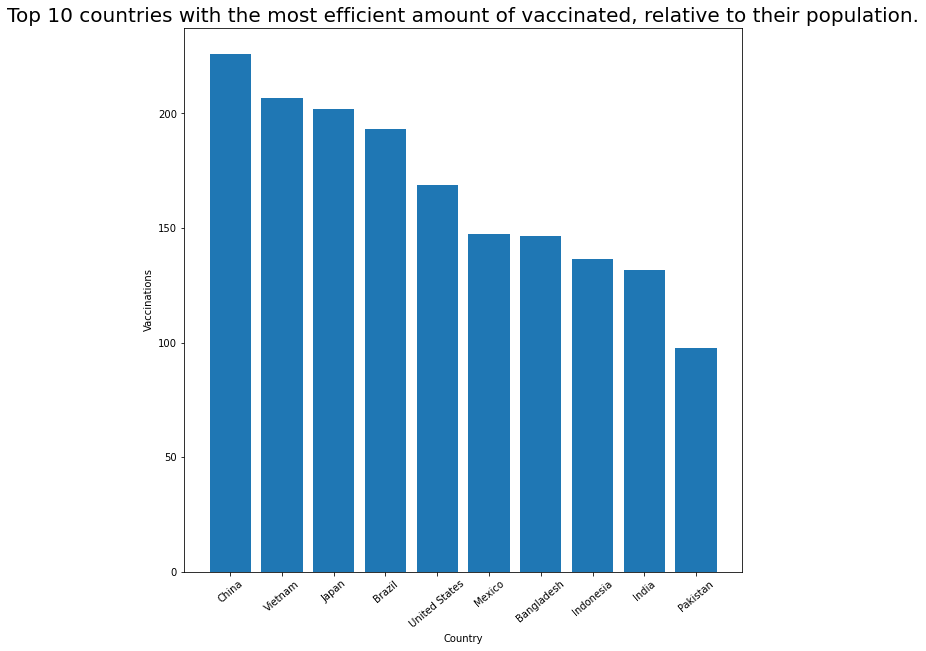

In [171]:
plt.figure(figsize=(10, 10))
plt.bar(topvaccinebycountry.index, topvaccinebycountry.total_vaccinations_per_hundred)

plt.xticks(rotation = 40)
plt.title("Top 10 countries with the most efficient amount of vaccinated, relative to their population.", fontsize=20)
plt.ylabel('Vaccinations')
plt.xlabel('Country')
plt.show()

In order for the data set to not be skewed because of the differences in population, the researchers have decided to pick
the top 10 vaccinated countries and measured the amount of vaccinated people relative to their population. To determine their
efficiency in vaccinating their people.

<p style="font-size:2rem;color:orange;text-align: center;"> Total Vaccines Delivered by Countries

In [183]:
vacc_brandby_country = dataset.groupby('vaccines').max().sort_values('total_vaccinations', ascending=False)
vacc_brandby_country.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
vaccines,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2022-03-29,3.263129e+09,1.275541e+09,22424286.0,225.94
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-03-29,1.834501e+09,9.848381e+08,10037995.0,131.66
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-03-28,5.601818e+08,2.553624e+08,3506960.0,227.27
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1941268.0,193.26
"Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1897011.0,136.45


In [184]:
vacc_brandby_country = vacc_brandby_country.iloc[:10]
vacc_brandby_country

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
vaccines,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2022-03-29,3.263129e+09,1.275541e+09,22424286.0,225.94
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-03-29,1.834501e+09,9.848381e+08,10037995.0,131.66
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-03-28,5.601818e+08,2.553624e+08,3506960.0,227.27
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1941268.0,193.26
"Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1897011.0,136.45
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2022-03-29,2.543456e+08,1.024675e+08,1997542.0,237.79
"Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Bangladesh,BGD,2022-03-29,2.436427e+08,1.275441e+08,3758404.0,146.50
"CanSino, Covaxin, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik V",Pakistan,PAK,2022-03-10,2.193686e+08,1.280741e+08,2175773.0,97.41
"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",Vietnam,VNM,2022-03-22,2.031444e+08,7.994719e+07,1675471.0,206.93


In [185]:
vacc_brandby_country=vacc_brandby_country.reset_index()
vacc_brandby_country

,vaccines,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,CHN,2022-03-29,3.263129e+09,1.275541e+09,22424286.0,225.94
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-03-29,1.834501e+09,9.848381e+08,10037995.0,131.66
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-03-28,5.601818e+08,2.553624e+08,3506960.0,227.27
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1941268.0,193.26
4,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1897011.0,136.45
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2022-03-29,2.543456e+08,1.024675e+08,1997542.0,237.79
6,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Bangladesh,BGD,2022-03-29,2.436427e+08,1.275441e+08,3758404.0,146.50
7,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...",Pakistan,PAK,2022-03-10,2.193686e+08,1.280741e+08,2175773.0,97.41
8,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",Vietnam,VNM,2022-03-22,2.031444e+08,7.994719e+07,1675471.0,206.93
9,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,MEX,2022-03-29,1.919079e+08,8.558029e+07,1648223.0,147.32


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001'),
  Text(1, 0, 'Covaxin, Oxford/AstraZeneca, Sputnik V'),
  Text(2, 0, 'Johnson&Johnson, Moderna, Pfizer/BioNTech'),
  Text(3, 0, 'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac'),
  Text(4, 0, 'Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac'),
  Text(5, 0, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(6, 0, 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac'),
  Text(7, 0, 'CanSino, Covaxin, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik V'),
  Text(8, 0, 'Abdala, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'),
  Text(9, 0, 'CanSino, Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V')])

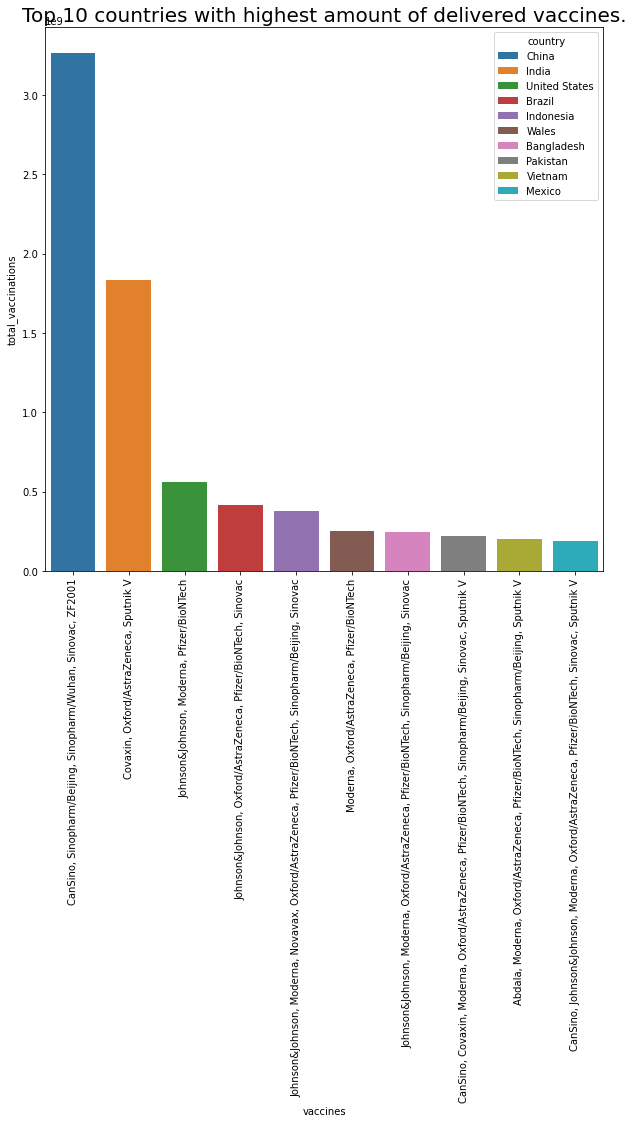

In [187]:
plt.figure(figsize=(10,10))
sns.barplot(data = vacc_brandby_country, x='vaccines', y = 'total_vaccinations', hue = 'country', dodge=False)
plt.title("Top 10 countries with highest amount of delivered vaccines.", fontsize=20)
plt.xticks(rotation=90)

This shows the top vaccines given and used in each of the ten countries. 

This data analysis of the vaccine can provide information on creating response plans, and for the improvement of vaccine distribution to the Philippines. By analyzing the top 10 countries and it's vaccines in efficiency distribution, the Philippine government can research the framework and plans of the top countries in order to improve and apply it to our country.